In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Create Separate Files for each Department 
cln_df = pd.read_csv('Preprocess_Completed.csv')
seg_cln_df = cln_df.groupby('Department')
seg_cln_df.get_group("BENG").to_csv("Beng_clnd_data.csv")
seg_cln_df.get_group("CSE").to_csv("Cse_clnd_data.csv")
seg_cln_df.get_group("ECE").to_csv("Ece_clnd_data.csv")
seg_cln_df.get_group("MAE").to_csv("Mae_clnd_data.csv")

In [4]:
def term_to_numeric(term):
    '''
    This function converts the Quarter terms into a numeric date. Each quarter is 
    assigned a number equal to the middle month of that particular quarter. 
    Example Fall 2018 -> 2018-11-01
    '''
    assert isinstance(term,str)
    if(term[0:2] == 'SP'):
        num_date = pd.to_datetime('20' + term[-2:] + '-05-01')
    
    elif(term[0:2] == 'FA'):
        num_date = pd.to_datetime('20' + term[-2:] + '-11-01')

    elif(term[0:2] == 'WI'):
        num_date = pd.to_datetime('20' + term[-2:] + '-02-01')
    
    else:
        num_date = pd.to_datetime('20' + term[-2:] + '-08-01')

        
    return num_date

def compute_grade_deviation(df,top_dev=10,good_dev=5,neg_dev=5):
    '''
    The following function computes the grade deviation 
    1. Difference of Expected grade - Actual grade 
    2. Expected grade - Actual grade
    3. List the top subjects in the current department with most abs deviation
    4. List the top_dev subjects with most difference
    5. List the good_dev, neg_dev course with most positive deviation and negative deviation
    
    Input: Data frame with Course Number, Expected Grade and Received Grade
    Ouput: Data frame with top_dev number of courses and their deviations
    '''
    assert isinstance(df,pd.DataFrame) and isinstance(good_dev,int) \
            and isinstance(top_dev,int) and isinstance(neg_dev,int)
    assert good_dev > 0 and top_dev > 0 and neg_dev > 0
    
    df['Grade_dev_abs'] = np.absolute(df['Avg Grade Expected'] - df['Avg Grade Received'])    
    df_sel = df[['Course Number','Grade_dev_abs','Term']]
    df_sel = df_sel.sort_values(by=['Grade_dev_abs'],ascending=False)
    df_sel.index = np.arange(1, len(df_sel)+1)
    unique_course = []
    unique_deviation = []
    i,j = (0,0)
    #Get unique courses
    while(i < top_dev):
        course = df_sel['Course Number'].iloc[j]
        deviation = df_sel['Grade_dev_abs'].iloc[j]
        j = j + 1
        if(course in unique_course):
            pass
        else:
            unique_course.append(course)
            unique_deviation.append(deviation)
            i = i + 1
    d = {'Course':unique_course,'Grade_Deviation':unique_deviation}
    
    return pd.DataFrame(d,index=range(1,top_dev+1))


In [5]:
ece_grp = pd.read_csv('Ece_clnd_data.csv')
dev_grade_df = compute_grade_deviation(ece_grp)
dev_grade_df

,Course,Grade_Deviation
1,ECE 156,1.42
2,ECE 65,1.37
3,ECE 164,1.32
4,ECE 35,1.23
5,ECE 109,1.18
6,ECE 30,1.18
7,ECE 154B,1.10
8,ECE 101,1.08
9,ECE 102,1.08
10,ECE 15,1.04


In [6]:
def term_to_numeric(term):
    '''
    This function converts the Quarter terms into a numeric date. Each quarter is 
    assigned a number equal to the middle month of that particular quarter. 
    Example Fall 2018 -> 2018-11-01
    '''
    assert isinstance(term,str)
    if(term[0:2] == 'SP'):
        num_date = pd.to_datetime('20' + term[-2:] + '-05-01')
    
    elif(term[0:2] == 'FA'):
        num_date = pd.to_datetime('20' + term[-2:] + '-11-01')

    elif(term[0:2] == 'WI'):
        num_date = pd.to_datetime('20' + term[-2:] + '-02-01')
    
    else:
        num_date = pd.to_datetime('20' + term[-2:] + '-08-01')

        
    return num_date
ece_grp['Term_numeric'] = ece_grp['Term'].apply(term_to_numeric)
ece_grp

,Unnamed: 0,Department,Course Number,Instructor,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,Grade_dev_abs,Term_numeric
0,1921,ECE,ECE 100,"Abd El-Messih, Andrew Saad",WI19,43,40,76.9,74.4,9.00,3.160,2.79,0.370,2019-02-01
1,1922,ECE,ECE 100,"Coles, William A.",FA09,57,39,68.4,47.4,7.22,3.110,2.18,0.930,2009-11-01
2,1923,ECE,ECE 100,"Cruz, Rene L",WI13,77,38,80.0,31.4,10.03,3.000,2.68,0.320,2013-02-01
3,1924,ECE,ECE 100,"Kante, Boubacar",WI14,52,24,63.6,22.7,8.05,3.100,2.54,0.560,2014-02-01
4,1925,ECE,ECE 100,"Kante, Boubacar",WI15,101,75,90.5,89.2,9.05,3.200,2.65,0.550,2015-02-01
5,1926,ECE,ECE 100,"Kante, Boubacar",WI16,86,73,88.9,83.3,8.56,3.030,2.45,0.580,2016-02-01
6,1927,ECE,ECE 100,"Kante, Boubacar",WI17,40,33,93.9,100.0,8.02,2.970,2.95,0.020,2017-02-01
7,1928,ECE,ECE 100,"Kante, Boubacar",WI18,53,38,83.8,91.9,9.36,3.110,3.19,0.080,2018-02-01
8,1929,ECE,ECE 100,"Larson, Lawrence E.",FA10,79,39,97.4,100.0,7.55,3.550,2.94,0.610,2010-11-01
9,1930,ECE,ECE 100,"Larson, Lawrence E.",WI10,70,35,94.3,100.0,8.09,3.430,2.47,0.960,2010-02-01


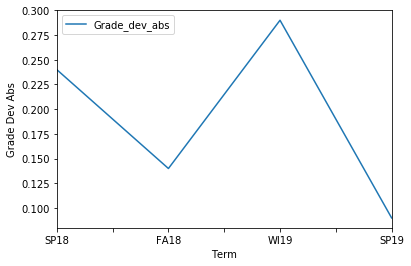

In [7]:
ece_subjects = ece_grp.groupby(['Course Number'])
ece_143 = ece_subjects.get_group('ECE 143 ')
ece_143 = ece_143.sort_values(by=['Term_numeric'],ascending=True)
ece_143
ax = plt.gca()
ece_143.plot(x="Term",y="Grade_dev_abs",ax=ax)
ax.set_ylabel('Grade Dev Abs')
plt.show()

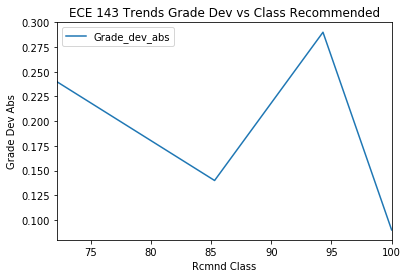

In [17]:
ax = plt.gca()
ece_143.plot(kind='line',x="Rcmnd Class",y="Grade_dev_abs",ax=ax,title="ECE 143 Trends: Grade Dev vs Class Recommended")
ax.set_ylabel('Grade Dev Abs')
plt.show()

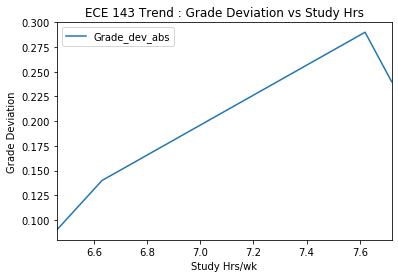

In [18]:
ax = plt.gca()
ece_143_hrs_stdy = ece_143.sort_values(by=['Study Hrs/wk'],ascending=True)
ece_143_hrs_stdy.plot(kind='line',x="Study Hrs/wk",y="Grade_dev_abs",ax=ax,title='ECE 143 Trend : Grade Deviation vs Study Hrs')
ax.set_ylabel('Grade Deviation')
plt.show()

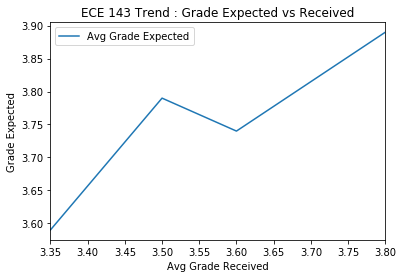

In [19]:
ece_143_ac_vs_rc = ece_143.sort_values(by=['Avg Grade Received'],ascending=True)
ax = plt.gca()
ece_143_ac_vs_rc.plot(kind='line',x="Avg Grade Received",y="Avg Grade Expected",ax=ax,title='ECE 143 Trend : Grade Expected vs Received')
ax.set_ylabel('Grade Expected')
plt.show()

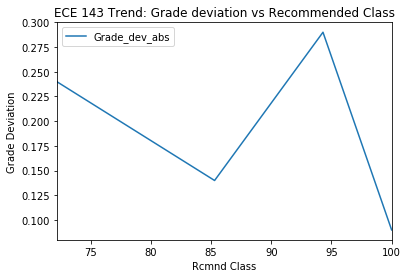

In [20]:
ece_143_prof_rcmd = ece_143.sort_values(by=['Rcmnd Class'],ascending=True)
ax = plt.gca()
ece_143_prof_rcmd.plot(kind='line',x="Rcmnd Class",y="Grade_dev_abs",ax=ax,title='ECE 143 Trend: Grade deviation vs Recommended Class')
ax.set_ylabel('Grade Deviation')
plt.show()

In [12]:
cse_grp = pd.read_csv('Cse_clnd_data.csv')
compute_grade_deviation(cse_grp)

,Course,Grade_Deviation
1,CSE 140,1.32
2,CSE 8AL,1.11
3,CSE 11,1.04
4,CSE 140L,1.03
5,CSE 191,1.00
6,CSE 20,1.00
7,CSE 131,0.96
8,CSE 127,0.95
9,CSE 105,0.94
10,CSE 5A,0.93


In [13]:
beng_grp = pd.read_csv('Beng_clnd_data.csv')
compute_grade_deviation(beng_grp)

,Course,Grade_Deviation
1,BENG 100,0.76
2,BENG 140A,0.72
3,BENG 140B,0.71
4,BENG 186A,0.71
5,BENG 129A,0.70
6,BENG 109,0.68
7,BENG 101,0.68
8,BENG 126B,0.66
9,BENG 181,0.65
10,BENG 134,0.63


In [14]:
mae_grp = pd.read_csv('Mae_clnd_data.csv')
compute_grade_deviation(mae_grp)

,Course,Grade_Deviation
1,MAE 110A,1.23
2,MAE 20,1.11
3,MAE 140,1.09
4,MAE 130B,1.05
5,MAE 105,1.05
6,MAE 101C,1.03
7,MAE 120,1.03
8,MAE 104,1.02
9,MAE 118B,1.02
10,MAE 119,1.02


In [15]:
def get_feedback(df):
    '''
    This function computes the total enrolled students in each department
    and the number of feedbacks received in that deparment
    Input: Data Frame of each department with Columns having Enroll and Evals Made
    Output: Total evaluation received, total enrollment and percentage evals in the course 
    '''
    assert isinstance(df,pd.DataFrame) and ('Enroll' in df.columns) and ('Evals Made' in df.columns)
    total_enroll = int(df.agg({'Enroll' : 'sum'}))
    total_evalls = int(df.agg({'Evals Made' : 'sum'}))
    feedback_ratio = total_evalls / total_enroll
    return total_evalls,total_enroll,feedback_ratio*100

Text(0, 0.5, 'Cape Responce Percentage')

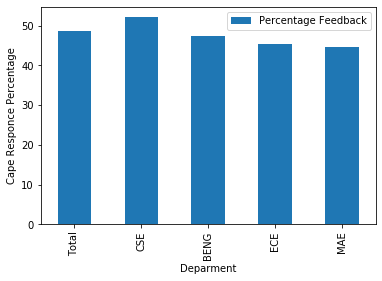

In [16]:
ece_tot_eval,ece_tot_enrol,ece_fdbk = get_feedback(ece_grp)
cse_tot_eval,cse_tot_enrol,cse_fdbk = get_feedback(cse_grp)
mae_tot_eval,mae_tot_enrol,mae_fdbk = get_feedback(mae_grp)
beng_tot_eval,beng_tot_enrol,beng_fdbk = get_feedback(beng_grp)
tot_fdbk = (ece_tot_eval + beng_tot_eval + cse_tot_eval + mae_tot_eval)*100 / (ece_tot_enrol + beng_tot_enrol + cse_tot_enrol + mae_tot_enrol) 
values = [tot_fdbk,cse_fdbk,beng_fdbk,ece_fdbk,mae_fdbk]
deparment = 'Deparment'
feedback = 'Percentage Feedback'
deparment_names = ['Total','CSE','BENG','ECE','MAE']
fdbk_df = pd.DataFrame({deparment : deparment_names, feedback : values})
fdbk_bar_plot = fdbk_df.plot(x = deparment,y = feedback,kind='bar')
fdbk_bar_plot.set_ylabel('Cape Responce Percentage')
